In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from gw_lens_dir.overlap_lensing_sie_twoimages import overlap_sie
from gw_lens_dir.L_unlensed import Lunlensed
pd.set_option('display.float_format', lambda x: '%.3e' % x)

#from pycbc.filter import match


/Users/saifali/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# SIGMA = 5 km/s and 4.5 km/s

In [2]:
datadirName = "/Users/saifali/Desktop/gwlensing/SIE_glafic/data/"
plotdirName = "/Users/saifali/Desktop/gwlensing/plots/"

In [3]:
ein_rad_4 = 1.767909e-04
ein_rad_45 = 2.237510e-04
ein_rad_5 = 2.762358e-04
ein_rad_6 = 3.977795e-04

In [4]:
def dataframe_sorted_two_images(dataframe):
    
    df_unsorted = dataframe
    
    old_td_ind = [[0, 1] for i in range(df_unsorted.shape[0])]
    new_td_ind = [[0, 0] for i in range(df_unsorted.shape[0])]

    sorted_arr = np.zeros(df_unsorted.shape)
    
    for i_row in range(df_unsorted.shape[0]):
        
        #df_sorted = pd.DataFrame(columns=('source_y', 'mu_1', 'mu_2', 'td_1', 'td_2'))
        old_td_arr = np.array(df_unsorted.loc[i_row][-2:])
        #print(old_td_arr)
        new_td_arr = np.sort(old_td_arr)
        #print(new_td_arr)
        
        new_td_ind[i_row][0] = np.where(new_td_arr[0] == old_td_arr)[0][0]
        new_td_ind[i_row][1] = np.where(new_td_arr[1] == old_td_arr)[0][0]
        
        old_mu_arr = np.array(df_unsorted.loc[i_row][1:3])
        #print(old_mu_arr)
        new_mu_arr = np.array([old_mu_arr[new_td_ind[i_row][0]], old_mu_arr[new_td_ind[i_row][1]]])
        #print(new_mu_arr)
        
        sorted_arr[i_row][0] = df_unsorted.loc[i_row][0]
        sorted_arr[i_row][1] = new_mu_arr[0]
        sorted_arr[i_row][2] = new_mu_arr[1]
        sorted_arr[i_row][3] = new_td_arr[0]
        sorted_arr[i_row][4] = new_td_arr[1]
        
    df_sorted = pd.DataFrame(sorted_arr, columns = ['source_y', 'mu_1', 'mu_2', 'td_1', 'td_2'])
    
    return df_sorted

In [5]:
df_theta_0_sigma_5 = pd.read_csv(datadirName + "flux_twoimages_theta_0_sigma=5.csv")
df_theta_0_sigma_5['source_x'] = df_theta_0_sigma_5['source_x'] 
df_theta_0_sigma_5['td_2'] = df_theta_0_sigma_5['td_2'] * 86400 
df_theta_0_sigma_5['I'] = np.abs(df_theta_0_sigma_5['mu_2']) / np.abs(df_theta_0_sigma_5['mu_1'])
#df_theta_0['low ft_d lim'] = df_theta_0['td_2'] * 20
df_theta_0_sigma_5.to_csv(datadirName + "flux_twoimages_theta_0_sigma=5_sorted.csv", index = False)
print(df_theta_0_sigma_5)

df_theta_0_sigma_45 = pd.read_csv(datadirName + "flux_twoimages_theta_0_sigma=4.5.csv")
df_theta_0_sigma_45['source_x'] = df_theta_0_sigma_45['source_x'] 
df_theta_0_sigma_45['td_2'] = df_theta_0_sigma_45['td_2'] * 86400 
df_theta_0_sigma_45['I'] = np.abs(df_theta_0_sigma_45['mu_2']) / np.abs(df_theta_0_sigma_45['mu_1'])
#df_theta_0['low ft_d lim'] = df_theta_0['td_2'] * 20
df_theta_0_sigma_45.to_csv(datadirName + "flux_twoimages_theta_0_sigma=4.5_sorted.csv", index = False)
print(df_theta_0_sigma_45)

   source_x      mu_1       mu_2      td_1      td_2         I
0 4.500e-05 4.143e+00 -1.296e+02 0.000e+00 3.064e-01 3.127e+01
1 7.422e-05 3.359e+00 -7.815e+00 0.000e+00 5.053e-01 2.327e+00
2 1.034e-04 2.888e+00 -3.561e+00 0.000e+00 7.042e-01 1.233e+00
3 1.327e-04 2.574e+00 -2.077e+00 0.000e+00 9.032e-01 8.070e-01
4 1.619e-04 2.349e+00 -1.321e+00 0.000e+00 1.102e+00 5.625e-01
5 1.911e-04 2.181e+00 -8.636e-01 0.000e+00 1.301e+00 3.961e-01
6 2.203e-04 2.049e+00 -5.567e-01 0.000e+00 1.500e+00 2.716e-01
7 2.496e-04 1.945e+00 -3.366e-01 0.000e+00 1.699e+00 1.731e-01
8 2.788e-04 1.859e+00 -1.710e-01 0.000e+00 1.898e+00 9.201e-02
9 3.080e-04 1.787e+00 -4.194e-02 0.000e+00 2.097e+00 2.347e-02
   source_x      mu_1       mu_2      td_1      td_2         I
0 3.700e-05 4.119e+00 -9.784e+01 0.000e+00 2.040e-01 2.375e+01
1 6.044e-05 3.351e+00 -7.704e+00 0.000e+00 3.333e-01 2.299e+00
2 8.389e-05 2.886e+00 -3.552e+00 0.000e+00 4.626e-01 1.231e+00
3 1.073e-04 2.575e+00 -2.082e+00 0.000e+00 5.919e-01 8.

In [6]:
df_theta_45_sigma_5 = pd.read_csv(datadirName + "flux_twoimages_theta_45_sigma=5.csv")
df_theta_45_sigma_5 = dataframe_sorted_two_images(df_theta_45_sigma_5)
df_theta_45_sigma_5['source_y'] = df_theta_45_sigma_5['source_y'] 
df_theta_45_sigma_5['td_2'] = df_theta_45_sigma_5['td_2'] * 86400 
df_theta_45_sigma_5['I'] = np.abs(df_theta_45_sigma_5['mu_2']) / np.abs(df_theta_45_sigma_5['mu_1'])
#df_theta_45_sigma_5.to_csv(datadirName + "flux_twoimages_theta_45_sigma=5_sorted.csv", index = False)
print(df_theta_45_sigma_5)

df_theta_45_sigma_45 = pd.read_csv(datadirName + "flux_twoimages_theta_45_sigma=4.5.csv")
df_theta_45_sigma_45 = dataframe_sorted_two_images(df_theta_45_sigma_45)
df_theta_45_sigma_45['source_y'] = df_theta_45_sigma_45['source_y'] 
df_theta_45_sigma_45['td_2'] = df_theta_45_sigma_45['td_2'] * 86400 
df_theta_45_sigma_45['I'] = np.abs(df_theta_45_sigma_45['mu_2']) / np.abs(df_theta_45_sigma_45['mu_1'])
#df_theta_45_sigma_45.to_csv(datadirName + "flux_twoimages_theta_45_sigma=4.5_sorted.csv", index = False)
print(df_theta_45_sigma_45)

   source_y      mu_1       mu_2      td_1      td_2         I
0 2.687e-05 5.667e+00 -4.332e+00 0.000e+00 2.180e-01 7.645e-01
1 5.657e-05 4.520e+00 -3.059e+00 0.000e+00 3.975e-01 6.768e-01
2 8.627e-05 3.747e+00 -2.123e+00 0.000e+00 5.852e-01 5.666e-01
3 1.160e-04 3.222e+00 -1.481e+00 0.000e+00 7.761e-01 4.596e-01
4 1.457e-04 2.852e+00 -1.036e+00 0.000e+00 9.686e-01 3.633e-01
5 1.754e-04 2.583e+00 -7.184e-01 0.000e+00 1.162e+00 2.781e-01
6 2.051e-04 2.379e+00 -4.824e-01 0.000e+00 1.356e+00 2.028e-01
7 2.348e-04 2.220e+00 -3.015e-01 0.000e+00 1.550e+00 1.358e-01
8 2.645e-04 2.094e+00 -1.589e-01 0.000e+00 1.744e+00 7.588e-02
9 2.942e-04 1.991e+00 -4.383e-02 0.000e+00 1.939e+00 2.202e-02
   source_y      mu_1       mu_2      td_1      td_2         I
0 2.263e-05 5.618e+00 -4.281e+00 0.000e+00 1.471e-01 7.621e-01
1 4.651e-05 4.493e+00 -3.027e+00 0.000e+00 2.643e-01 6.738e-01
2 7.040e-05 3.734e+00 -2.106e+00 0.000e+00 3.866e-01 5.642e-01
3 9.428e-05 3.215e+00 -1.473e+00 0.000e+00 5.110e-01 4.

In [7]:
df_theta_90_sigma_5 = pd.read_csv(datadirName + "flux_twoimages_theta_90_sigma=5.csv")
df_theta_90_sigma_5 = dataframe_sorted_two_images(df_theta_90_sigma_5)
df_theta_90_sigma_5['source_y'] = df_theta_90_sigma_5['source_y']
df_theta_90_sigma_5['td_2'] = df_theta_90_sigma_5['td_2'] * 86400 
df_theta_90_sigma_5['I'] = np.abs(df_theta_90_sigma_5['mu_2']) / np.abs(df_theta_90_sigma_5['mu_1'])
#df_theta_90_sigma_5.to_csv(datadirName + "flux_twoimages_theta_90_sigma=5_sorted.csv", index = False)
print(df_theta_90_sigma_5)

df_theta_90_sigma_45 = pd.read_csv(datadirName + "flux_twoimages_theta_90_sigma=4.5.csv")
df_theta_90_sigma_45 = dataframe_sorted_two_images(df_theta_90_sigma_45)
df_theta_90_sigma_45['source_y'] = df_theta_90_sigma_45['source_y']
df_theta_90_sigma_45['td_2'] = df_theta_90_sigma_45['td_2'] * 86400 
df_theta_90_sigma_45['I'] = np.abs(df_theta_90_sigma_45['mu_2']) / np.abs(df_theta_90_sigma_45['mu_1'])
#df_theta_90_sigma_45.to_csv(datadirName + "flux_twoimages_theta_90_sigma=4.5_sorted.csv", index = False)
print(df_theta_90_sigma_45)

   source_y      mu_1       mu_2      td_1      td_2         I
0 5.200e-05 1.173e+02 -2.418e+00 0.000e+00 3.287e-01 2.061e-02
1 7.822e-05 1.283e+01 -1.713e+00 0.000e+00 4.944e-01 1.336e-01
2 1.044e-04 7.231e+00 -1.250e+00 0.000e+00 6.601e-01 1.728e-01
3 1.307e-04 5.230e+00 -9.215e-01 0.000e+00 8.258e-01 1.762e-01
4 1.569e-04 4.201e+00 -6.768e-01 0.000e+00 9.916e-01 1.611e-01
5 1.831e-04 3.575e+00 -4.874e-01 0.000e+00 1.157e+00 1.363e-01
6 2.093e-04 3.154e+00 -3.365e-01 0.000e+00 1.323e+00 1.067e-01
7 2.356e-04 2.851e+00 -2.133e-01 0.000e+00 1.489e+00 7.482e-02
8 2.618e-04 2.623e+00 -1.110e-01 0.000e+00 1.654e+00 4.230e-02
9 2.880e-04 2.445e+00 -2.452e-02 0.000e+00 1.820e+00 1.003e-02
   source_y      mu_1       mu_2      td_1      td_2         I
0 4.200e-05 1.234e+02 -2.423e+00 0.000e+00 2.150e-01 1.963e-02
1 6.267e-05 1.319e+01 -1.732e+00 0.000e+00 3.208e-01 1.313e-01
2 8.333e-05 7.412e+00 -1.273e+00 0.000e+00 4.266e-01 1.717e-01
3 1.040e-04 5.351e+00 -9.461e-01 0.000e+00 5.324e-01 1.

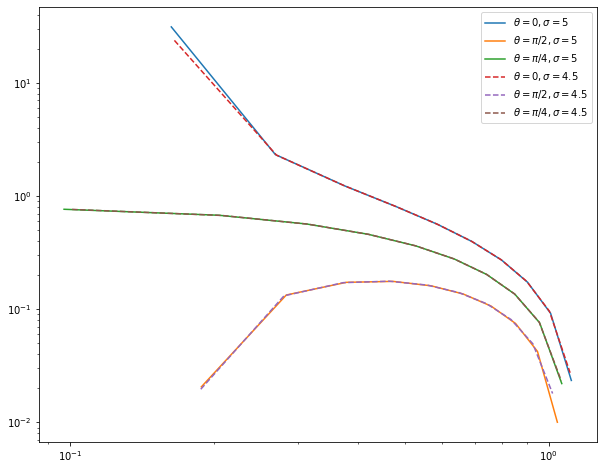

In [8]:
plt.figure(figsize = (10, 8))
plt.loglog(np.array(df_theta_0_sigma_5['source_x']) / ein_rad_5, np.array(df_theta_0_sigma_5['I']), label = r'$\theta = 0, \sigma = 5$')
plt.loglog(np.array(df_theta_90_sigma_5['source_y']) / ein_rad_5, np.array(df_theta_90_sigma_5['I']), label = r'$\theta = \pi / 2, \sigma = 5$')
plt.loglog(np.array(df_theta_45_sigma_5['source_y']) / ein_rad_5, np.array(df_theta_45_sigma_5['I']), label = r'$\theta = \pi / 4, \sigma = 5$')

plt.loglog(np.array(df_theta_0_sigma_45['source_x']) / ein_rad_45, np.array(df_theta_0_sigma_45['I']), '--', label = r'$\theta = 0, \sigma = 4.5$')
plt.loglog(np.array(df_theta_90_sigma_45['source_y']) / ein_rad_45, np.array(df_theta_90_sigma_45['I']), '--', label = r'$\theta = \pi / 2, \sigma = 4.5$')
plt.loglog(np.array(df_theta_45_sigma_45['source_y']) / ein_rad_45, np.array(df_theta_45_sigma_45['I']), '--', label = r'$\theta = \pi / 4, \sigma = 4.5$')
plt.legend(loc = 'best')

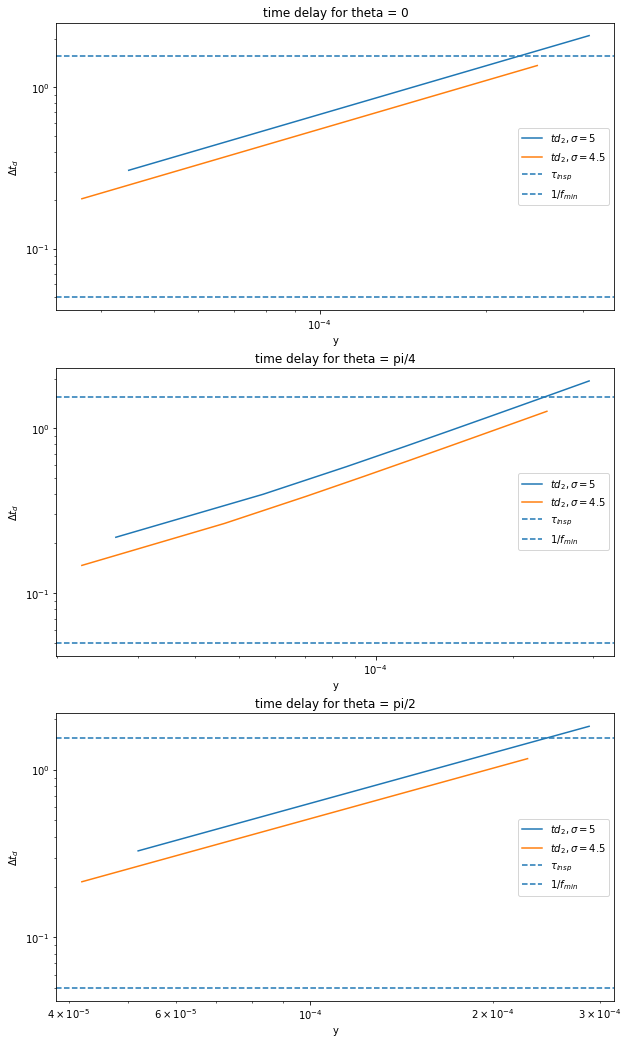

In [9]:
plt.figure(figsize = (10, 18))
# TIME DELAY PLOT FOR THETA = 0 DEG
plt.subplot(3, 1, 1)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_0_sigma_5['source_x']), np.array(df_theta_0_sigma_5['td_2']), label = r'$td_2, \sigma = 5$')
plt.loglog(np.array(df_theta_0_sigma_45['source_x']), np.array(df_theta_0_sigma_45['td_2']), label = r'$td_2, \sigma = 4.5$')
plt.axhline(y = 1.56, ls = '--', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = 0")
plt.legend()


# TIME DELAY PLOT FOR THETA = 45 DEG
plt.subplot(3, 1, 2)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_45_sigma_5['source_y']), np.array(df_theta_45_sigma_5['td_2']), label = r'$td_2, \sigma = 5$')
plt.loglog(np.array(df_theta_45_sigma_45['source_y']), np.array(df_theta_45_sigma_45['td_2']), label = r'$td_2, \sigma = 4.5$')
plt.axhline(y = 1.56, ls = '--', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/4")
plt.legend()

# TIME DELAY PLOT FOR THETA = 90 DEG
plt.subplot(3, 1, 3)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_90_sigma_5['source_y']), np.array(df_theta_90_sigma_5['td_2']), label = r'$td_2, \sigma = 5$')
plt.loglog(np.array(df_theta_90_sigma_45['source_y']), np.array(df_theta_90_sigma_45['td_2']), label = r'$td_2, \sigma = 4.5$')
plt.axhline(y = 1.56, ls = '--', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '--', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/2")
plt.legend()

In [30]:
def dataframe_sorted_four_images(dataframe):
    
    df_unsorted = dataframe
    
    old_td_ind = [[0, 1, 2, 3] for i in range(df_unsorted.shape[0])]
    new_td_ind = [[0, 0, 0, 0] for i in range(df_unsorted.shape[0])]
    
    sorted_arr = np.zeros(df_unsorted.shape)
    #print(sorted_arr)
    for i_row in range(df_unsorted.shape[0]):
        
        old_td_arr = np.array(df_unsorted.loc[i_row][-4:])
        #print(old_td_arr)
        new_td_arr = np.sort(old_td_arr)
        #print(new_td_arr)
       
        
        new_td_ind[i_row][0] = np.where(new_td_arr[0] == old_td_arr)[0][0]
        new_td_ind[i_row][1] = np.where(new_td_arr[1] == old_td_arr)[0][0]
        new_td_ind[i_row][2] = np.where(new_td_arr[2] == old_td_arr)[0][0]
        new_td_ind[i_row][3] = np.where(new_td_arr[3] == old_td_arr)[0][0]
        
        #print(new_td_ind[i_row])
        if len(new_td_ind[i_row]) != len(set(new_td_ind[i_row])):
            dup_ind = [idx for idx, item in enumerate(new_td_ind[i_row]) if item in new_td_ind[i_row][:idx]]
            non_common_ind = list(set(old_td_ind[i_row]) - set(new_td_ind[i_row]))[0]
            #print(non_common_ind)
            #print(dup_ind)
            #new_td_ind[i_row][dup_ind[0]] += 1
            new_td_ind[i_row][dup_ind[0]] = non_common_ind
            
        #if len(new_td_ind[i_row]) != len(set(new_td_ind[i_row])):
            #uniq_arr, dup_ind = np.unique(new_td_ind[i_row], return_index = True)
            #print(uniq_arr, dup_ind)
            #new_td_ind[i_row][dup_ind[-1]] += 1

        #print(new_td_ind[i_row])
        
        old_mu_arr = np.array(df_unsorted.loc[i_row][1:5])
        #print(old_mu_arr)
        new_mu_arr = np.array([old_mu_arr[new_td_ind[i_row][0]], old_mu_arr[new_td_ind[i_row][1]], old_mu_arr[new_td_ind[i_row][2]], 
                               old_mu_arr[new_td_ind[i_row][3]]])
    
        #print(new_mu_arr)
        #print('\n')
        sorted_arr[i_row][0] = df_unsorted.loc[i_row][0]
        sorted_arr[i_row][1] = new_mu_arr[0]
        sorted_arr[i_row][2] = new_mu_arr[1]
        sorted_arr[i_row][3] = new_mu_arr[2]
        sorted_arr[i_row][4] = new_mu_arr[3]
        sorted_arr[i_row][5] = new_td_arr[0]
        sorted_arr[i_row][6] = new_td_arr[1]
        sorted_arr[i_row][7] = new_td_arr[2]
        sorted_arr[i_row][8] = new_td_arr[3]
    #print(sorted_arr)   
    df_sorted = pd.DataFrame(sorted_arr, columns = ['source_x', 'mu_1', 'mu_2', 'mu_3', 'mu_4', 'td_1', 'td_2', 'td_3', 'td_4'])
    
    return df_sorted

In [11]:
df_theta_0_four_sigma_5 = pd.read_csv(datadirName + "flux_fourimages_theta_0_sigma=5.csv")
df_theta_0_four_sigma_5 = dataframe_sorted_four_images(df_theta_0_four_sigma_5)
df_theta_0_four_sigma_5['source_x'] = df_theta_0_four_sigma_5['source_x'] 
df_theta_0_four_sigma_5['td_2'] = df_theta_0_four_sigma_5['td_2'] * 86400 
df_theta_0_four_sigma_5['td_3'] = df_theta_0_four_sigma_5['td_3'] * 86400 
df_theta_0_four_sigma_5['td_4'] = df_theta_0_four_sigma_5['td_4'] * 86400 
df_theta_0_four_sigma_5['I_2'] = np.abs(df_theta_0_four_sigma_5['mu_2']) / np.abs(df_theta_0_four_sigma_5['mu_1'])
df_theta_0_four_sigma_5['I_3'] = np.abs(df_theta_0_four_sigma_5['mu_3']) / np.abs(df_theta_0_four_sigma_5['mu_1'])
df_theta_0_four_sigma_5['I_4'] = np.abs(df_theta_0_four_sigma_5['mu_4']) / np.abs(df_theta_0_four_sigma_5['mu_1'])

df_theta_0_four_sigma_5.to_csv(datadirName + "flux_fourimages_theta_0_sigma=5_sorted.csv", index = False)
df_theta_0_four_sigma_5

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,1.500e-05,5.772e+00,1.091e+01,-6.943e+00,-6.943e+00,0.000e+00,1.021e-01,1.346e-01,1.346e-01,1.889e+00,1.203e+00,1.203e+00
1,1.800e-05,5.537e+00,1.210e+01,-7.423e+00,-7.423e+00,0.000e+00,1.225e-01,1.485e-01,1.485e-01,2.185e+00,1.341e+00,1.341e+00
2,2.100e-05,5.324e+00,1.362e+01,-8.079e+00,-8.079e+00,0.000e+00,1.430e-01,1.632e-01,1.632e-01,2.559e+00,1.517e+00,1.517e+00
3,2.400e-05,5.130e+00,1.563e+01,-8.986e+00,-8.986e+00,0.000e+00,1.634e-01,1.785e-01,1.785e-01,3.046e+00,1.752e+00,1.752e+00
4,2.700e-05,4.953e+00,1.839e+01,-1.028e+01,-1.028e+01,0.000e+00,1.838e-01,1.946e-01,1.946e-01,3.713e+00,2.076e+00,2.076e+00
5,3.000e-05,4.790e+00,2.244e+01,-1.223e+01,-1.223e+01,0.000e+00,2.042e-01,2.114e-01,2.114e-01,4.685e+00,2.552e+00,2.552e+00
6,3.300e-05,4.640e+00,2.895e+01,-1.541e+01,-1.541e+01,0.000e+00,2.247e-01,2.289e-01,2.289e-01,6.238e+00,3.320e+00,3.320e+00
7,3.600e-05,4.502e+00,4.113e+01,-2.143e+01,-2.143e+01,0.000e+00,2.451e-01,2.471e-01,2.471e-01,9.135e+00,4.760e+00,4.760e+00
8,3.900e-05,4.373e+00,7.212e+01,-3.686e+01,-3.686e+01,0.000e+00,2.655e-01,2.662e-01,2.662e-01,1.649e+01,8.429e+00,8.429e+00
9,4.200e-05,4.254e+00,3.134e+02,-1.574e+02,-1.574e+02,0.000e+00,2.859e-01,2.860e-01,2.860e-01,7.366e+01,3.701e+01,3.701e+01


In [12]:
df_theta_0_four_sigma_45 = pd.read_csv(datadirName + "flux_fourimages_theta_0_sigma=4.5.csv")
df_theta_0_four_sigma_45 = dataframe_sorted_four_images(df_theta_0_four_sigma_45)
df_theta_0_four_sigma_45['source_x'] = df_theta_0_four_sigma_45['source_x'] 
df_theta_0_four_sigma_45['td_2'] = df_theta_0_four_sigma_45['td_2'] * 86400 
df_theta_0_four_sigma_45['td_3'] = df_theta_0_four_sigma_45['td_3'] * 86400 
df_theta_0_four_sigma_45['td_4'] = df_theta_0_four_sigma_45['td_4'] * 86400 
df_theta_0_four_sigma_45['I_2'] = np.abs(df_theta_0_four_sigma_45['mu_2']) / np.abs(df_theta_0_four_sigma_45['mu_1'])
df_theta_0_four_sigma_45['I_3'] = np.abs(df_theta_0_four_sigma_45['mu_3']) / np.abs(df_theta_0_four_sigma_45['mu_1'])
df_theta_0_four_sigma_45['I_4'] = np.abs(df_theta_0_four_sigma_45['mu_4']) / np.abs(df_theta_0_four_sigma_45['mu_1'])
df_theta_0_four_sigma_45

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,1.500e-05,5.499e+00,1.234e+01,-7.523e+00,-7.523e+00,0.000e+00,8.272e-02,9.907e-02,9.907e-02,2.244e+00,1.368e+00,1.368e+00
1,1.711e-05,5.316e+00,1.369e+01,-8.111e+00,-8.111e+00,0.000e+00,9.436e-02,1.075e-01,1.075e-01,2.576e+00,1.526e+00,1.526e+00
2,1.922e-05,5.147e+00,1.542e+01,-8.892e+00,-8.892e+00,0.000e+00,1.060e-01,1.162e-01,1.162e-01,2.997e+00,1.728e+00,1.728e+00
3,2.133e-05,4.991e+00,1.769e+01,-9.951e+00,-9.951e+00,0.000e+00,1.176e-01,1.253e-01,1.253e-01,3.546e+00,1.994e+00,1.994e+00
4,2.344e-05,4.846e+00,2.082e+01,-1.144e+01,-1.144e+01,0.000e+00,1.293e-01,1.347e-01,1.347e-01,4.296e+00,2.361e+00,2.361e+00
5,2.556e-05,4.711e+00,2.537e+01,-1.365e+01,-1.365e+01,0.000e+00,1.409e-01,1.446e-01,1.446e-01,5.385e+00,2.898e+00,2.898e+00
6,2.767e-05,4.586e+00,3.265e+01,-1.723e+01,-1.723e+01,0.000e+00,1.526e-01,1.547e-01,1.547e-01,7.120e+00,3.758e+00,3.758e+00
7,2.978e-05,4.468e+00,4.612e+01,-2.391e+01,-2.391e+01,0.000e+00,1.642e-01,1.653e-01,1.653e-01,1.032e+01,5.352e+00,5.352e+00
8,3.189e-05,4.358e+00,7.958e+01,-4.059e+01,-4.059e+01,0.000e+00,1.758e-01,1.762e-01,1.762e-01,1.826e+01,9.313e+00,9.313e+00
9,3.400e-05,4.255e+00,3.049e+02,-1.532e+02,-1.532e+02,0.000e+00,1.875e-01,1.875e-01,1.875e-01,7.165e+01,3.600e+01,3.600e+01


In [13]:
df_theta_45_four_sigma_5 = pd.read_csv(datadirName + "flux_fourimages_theta_45_sigma=5.csv")
df_theta_45_four_sigma_5 = dataframe_sorted_four_images(df_theta_45_four_sigma_5)
df_theta_45_four_sigma_5['source_x'] = df_theta_45_four_sigma_5['source_x'] 
df_theta_45_four_sigma_5['td_2'] = df_theta_45_four_sigma_5['td_2'] * 86400 
df_theta_45_four_sigma_5['td_3'] = df_theta_45_four_sigma_5['td_3'] * 86400 
df_theta_45_four_sigma_5['td_4'] = df_theta_45_four_sigma_5['td_4'] * 86400 
df_theta_45_four_sigma_5['I_2'] = np.abs(df_theta_45_four_sigma_5['mu_2']) / np.abs(df_theta_45_four_sigma_5['mu_1'])
df_theta_45_four_sigma_5['I_3'] = np.abs(df_theta_45_four_sigma_5['mu_3']) / np.abs(df_theta_45_four_sigma_5['mu_1'])
df_theta_45_four_sigma_5['I_4'] = np.abs(df_theta_45_four_sigma_5['mu_4']) / np.abs(df_theta_45_four_sigma_5['mu_1'])
df_theta_45_four_sigma_5

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,1.131e-05,6.518e+00,9.412e+00,-7.965e+00,-5.166e+00,0.000e+00,5.361e-02,8.170e-02,1.314e-01,1.444e+00,1.222e+00,7.926e-01
1,1.257e-05,6.437e+00,9.824e+00,-8.374e+00,-5.089e+00,0.000e+00,5.933e-02,8.307e-02,1.381e-01,1.526e+00,1.301e+00,7.906e-01
2,1.383e-05,6.360e+00,1.032e+01,-8.871e+00,-5.015e+00,0.000e+00,6.497e-02,8.459e-02,1.449e-01,1.623e+00,1.395e+00,7.886e-01
3,1.508e-05,6.284e+00,1.095e+01,-9.492e+00,-4.943e+00,0.000e+00,7.051e-02,8.626e-02,1.517e-01,1.742e+00,1.510e+00,7.866e-01
4,1.634e-05,6.211e+00,1.175e+01,-1.029e+01,-4.873e+00,0.000e+00,7.595e-02,8.809e-02,1.585e-01,1.892e+00,1.657e+00,7.845e-01
5,1.760e-05,6.141e+00,1.285e+01,-1.139e+01,-4.804e+00,0.000e+00,8.126e-02,9.010e-02,1.654e-01,2.092e+00,1.854e+00,7.823e-01
6,1.886e-05,6.071e+00,1.444e+01,-1.298e+01,-4.737e+00,0.000e+00,8.641e-02,9.232e-02,1.724e-01,2.378e+00,2.137e+00,7.802e-01
7,2.011e-05,6.004e+00,1.706e+01,-1.560e+01,-4.671e+00,0.000e+00,9.138e-02,9.476e-02,1.794e-01,2.842e+00,2.598e+00,7.779e-01
8,2.137e-05,5.938e+00,2.260e+01,-2.113e+01,-4.606e+00,0.000e+00,9.612e-02,9.748e-02,1.865e-01,3.806e+00,3.559e+00,7.756e-01
9,2.263e-05,5.874e+00,5.493e+01,-5.347e+01,-4.542e+00,0.000e+00,1.005e-01,1.006e-01,1.936e-01,9.352e+00,9.102e+00,7.732e-01


In [14]:
df_theta_45_four_sigma_45 = pd.read_csv(datadirName + "flux_fourimages_theta_45_sigma=4.5.csv")
df_theta_45_four_sigma_45 = dataframe_sorted_four_images(df_theta_45_four_sigma_45)
df_theta_45_four_sigma_45['source_x'] = df_theta_45_four_sigma_45['source_x'] 
df_theta_45_four_sigma_45['td_2'] = df_theta_45_four_sigma_45['td_2'] * 86400 
df_theta_45_four_sigma_45['td_3'] = df_theta_45_four_sigma_45['td_3'] * 86400 
df_theta_45_four_sigma_45['td_4'] = df_theta_45_four_sigma_45['td_4'] * 86400 
df_theta_45_four_sigma_45['I_2'] = np.abs(df_theta_45_four_sigma_45['mu_2']) / np.abs(df_theta_45_four_sigma_45['mu_1'])
df_theta_45_four_sigma_45['I_3'] = np.abs(df_theta_45_four_sigma_45['mu_3']) / np.abs(df_theta_45_four_sigma_45['mu_1'])
df_theta_45_four_sigma_45['I_4'] = np.abs(df_theta_45_four_sigma_45['mu_4']) / np.abs(df_theta_45_four_sigma_45['mu_1'])
df_theta_45_four_sigma_45

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,7.071e-06,6.693e+00,8.752e+00,-7.315e+00,-5.332e+00,0.000e+00,2.732e-02,5.203e-02,7.739e-02,1.308e+00,1.093e+00,7.967e-01
1,8.328e-06,6.586e+00,9.123e+00,-7.680e+00,-5.231e+00,0.000e+00,3.206e-02,5.293e-02,8.268e-02,1.385e+00,1.166e+00,7.942e-01
2,9.585e-06,6.484e+00,9.573e+00,-8.125e+00,-5.134e+00,0.000e+00,3.673e-02,5.396e-02,8.805e-02,1.476e+00,1.253e+00,7.918e-01
3,1.084e-05,6.387e+00,1.014e+01,-8.684e+00,-5.041e+00,0.000e+00,4.133e-02,5.514e-02,9.348e-02,1.587e+00,1.360e+00,7.893e-01
4,1.210e-05,6.293e+00,1.087e+01,-9.411e+00,-4.951e+00,0.000e+00,4.584e-02,5.646e-02,9.898e-02,1.727e+00,1.495e+00,7.868e-01
5,1.336e-05,6.203e+00,1.186e+01,-1.040e+01,-4.865e+00,0.000e+00,5.024e-02,5.794e-02,1.045e-01,1.913e+00,1.677e+00,7.842e-01
6,1.461e-05,6.116e+00,1.333e+01,-1.187e+01,-4.780e+00,0.000e+00,5.451e-02,5.961e-02,1.102e-01,2.180e+00,1.941e+00,7.816e-01
7,1.587e-05,6.032e+00,1.579e+01,-1.433e+01,-4.698e+00,0.000e+00,5.862e-02,6.149e-02,1.158e-01,2.618e+00,2.375e+00,7.788e-01
8,1.713e-05,5.950e+00,2.117e+01,-1.970e+01,-4.617e+00,0.000e+00,6.252e-02,6.362e-02,1.215e-01,3.558e+00,3.311e+00,7.760e-01
9,1.838e-05,5.871e+00,6.525e+01,-6.378e+01,-4.538e+00,0.000e+00,6.609e-02,6.612e-02,1.273e-01,1.111e+01,1.086e+01,7.730e-01


In [15]:
df_theta_90_four_sigma_5 = pd.read_csv(datadirName + "flux_fourimages_theta_90_sigma=5.csv")
df_theta_90_four_sigma_5 = dataframe_sorted_four_images(df_theta_90_four_sigma_5)
df_theta_90_four_sigma_5['source_x'] = df_theta_90_four_sigma_5['source_x'] 
df_theta_90_four_sigma_5['td_2'] = df_theta_90_four_sigma_5['td_2'] * 86400 
df_theta_90_four_sigma_5['td_3'] = df_theta_90_four_sigma_5['td_3'] * 86400 
df_theta_90_four_sigma_5['td_4'] = df_theta_90_four_sigma_5['td_4'] * 86400 
df_theta_90_four_sigma_5['I_2'] = np.abs(df_theta_90_four_sigma_5['mu_2']) / np.abs(df_theta_90_four_sigma_5['mu_1'])
df_theta_90_four_sigma_5['I_3'] = np.abs(df_theta_90_four_sigma_5['mu_3']) / np.abs(df_theta_90_four_sigma_5['mu_1'])
df_theta_90_four_sigma_5['I_4'] = np.abs(df_theta_90_four_sigma_5['mu_4']) / np.abs(df_theta_90_four_sigma_5['mu_1'])
df_theta_90_four_sigma_5

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,1.500e-05,8.171e+00,8.171e+00,-9.146e+00,-4.393e+00,0.000e+00,2.196e-16,3.532e-02,1.301e-01,1.000e+00,1.119e+00,5.376e-01
1,1.867e-05,8.639e+00,8.639e+00,-1.037e+01,-4.101e+00,0.000e+00,3.308e-14,2.794e-02,1.459e-01,1.000e+00,1.201e+00,4.747e-01
2,2.233e-05,9.290e+00,9.290e+00,-1.193e+01,-3.838e+00,0.000e+00,7.318e-17,2.145e-02,1.626e-01,1.000e+00,1.284e+00,4.132e-01
3,2.600e-05,1.020e+01,1.020e+01,-1.399e+01,-3.602e+00,0.000e+00,2.598e-14,1.585e-02,1.802e-01,1.000e+00,1.371e+00,3.530e-01
4,2.967e-05,1.152e+01,1.152e+01,-1.683e+01,-3.388e+00,0.000e+00,1.171e-14,1.113e-02,1.986e-01,1.000e+00,1.461e+00,2.941e-01
5,3.333e-05,1.350e+01,1.350e+01,-2.100e+01,-3.192e+00,0.000e+00,9.631e-14,7.257e-03,2.179e-01,1.000e+00,1.555e+00,2.364e-01
6,3.700e-05,1.677e+01,1.677e+01,-2.770e+01,-3.014e+00,0.000e+00,1.237e-14,4.230e-03,2.381e-01,1.000e+00,1.652e+00,1.797e-01
7,4.067e-05,2.298e+01,2.298e+01,-4.028e+01,-2.850e+00,0.000e+00,1.390e-15,2.028e-03,2.591e-01,1.000e+00,1.753e+00,1.240e-01
8,4.433e-05,3.902e+01,3.902e+01,-7.250e+01,-2.698e+00,0.000e+00,3.659e-16,6.346e-04,2.808e-01,1.000e+00,1.858e+00,6.916e-02
9,4.800e-05,1.696e+02,1.696e+02,-3.338e+02,-2.559e+00,0.000e+00,1.089e-09,3.033e-05,3.034e-01,1.000e+00,1.968e+00,1.509e-02


In [16]:
df_theta_90_four_sigma_45 = pd.read_csv(datadirName + "flux_fourimages_theta_90_sigma=4.5.csv")
df_theta_90_four_sigma_45 = dataframe_sorted_four_images(df_theta_90_four_sigma_45)
df_theta_90_four_sigma_45['source_x'] = df_theta_90_four_sigma_45['source_x'] 
df_theta_90_four_sigma_45['td_2'] = df_theta_90_four_sigma_45['td_2'] * 86400 
df_theta_90_four_sigma_45['td_3'] = df_theta_90_four_sigma_45['td_3'] * 86400 
df_theta_90_four_sigma_45['td_4'] = df_theta_90_four_sigma_45['td_4'] * 86400 
df_theta_90_four_sigma_45['I_2'] = np.abs(df_theta_90_four_sigma_45['mu_2']) / np.abs(df_theta_90_four_sigma_45['mu_1'])
df_theta_90_four_sigma_45['I_3'] = np.abs(df_theta_90_four_sigma_45['mu_3']) / np.abs(df_theta_90_four_sigma_45['mu_1'])
df_theta_90_four_sigma_45['I_4'] = np.abs(df_theta_90_four_sigma_45['mu_4']) / np.abs(df_theta_90_four_sigma_45['mu_1'])
df_theta_90_four_sigma_45

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,1.500e-05,8.617e+00,8.617e+00,-1.032e+01,-4.112e+00,0.000e+00,1.171e-13,1.851e-02,9.530e-02,1.000e+00,1.197e+00,4.772e-01
1,1.767e-05,9.184e+00,9.184e+00,-1.169e+01,-3.874e+00,0.000e+00,3.952e-15,1.465e-02,1.051e-01,1.000e+00,1.272e+00,4.218e-01
2,2.033e-05,9.950e+00,9.950e+00,-1.343e+01,-3.658e+00,0.000e+00,1.083e-14,1.125e-02,1.153e-01,1.000e+00,1.350e+00,3.676e-01
3,2.300e-05,1.100e+01,1.100e+01,-1.573e+01,-3.460e+00,0.000e+00,1.365e-13,8.311e-03,1.261e-01,1.000e+00,1.430e+00,3.144e-01
4,2.567e-05,1.250e+01,1.250e+01,-1.891e+01,-3.278e+00,0.000e+00,2.930e-13,5.832e-03,1.372e-01,1.000e+00,1.512e+00,2.622e-01
5,2.833e-05,1.475e+01,1.475e+01,-2.357e+01,-3.110e+00,0.000e+00,3.198e-14,3.802e-03,1.489e-01,1.000e+00,1.598e+00,2.108e-01
6,3.100e-05,1.844e+01,1.844e+01,-3.109e+01,-2.955e+00,0.000e+00,5.674e-13,2.213e-03,1.609e-01,1.000e+00,1.686e+00,1.603e-01
7,3.367e-05,2.544e+01,2.544e+01,-4.524e+01,-2.811e+00,0.000e+00,6.440e-15,1.058e-03,1.734e-01,1.000e+00,1.778e+00,1.105e-01
8,3.633e-05,4.361e+01,4.361e+01,-8.170e+01,-2.678e+00,0.000e+00,4.237e-14,3.285e-04,1.863e-01,1.000e+00,1.874e+00,6.141e-02
9,3.900e-05,1.977e+02,1.977e+02,-3.900e+02,-2.553e+00,0.000e+00,2.865e-11,1.459e-05,1.997e-01,1.000e+00,1.973e+00,1.292e-02


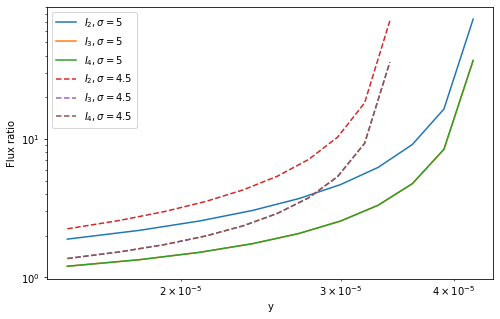

In [17]:
plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['I_2']), label = r'$I_2, \sigma = 5$')
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['I_3']), label = r'$I_3, \sigma = 5$')
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['I_4']), label = r'$I_4, \sigma = 5$')


plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['I_2']), '--', label = r'$I_2, \sigma = 4.5$')
plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['I_3']), '--', label = r'$I_3, \sigma = 4.5$')
plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['I_4']), '--', label = r'$I_4, \sigma = 4.5$')
plt.xlabel('y')
plt.ylabel('Flux ratio')
plt.legend()

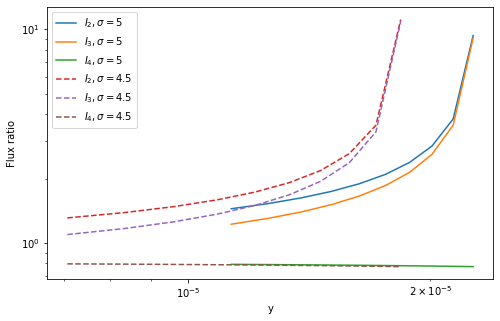

In [18]:
plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['I_2']), label = r'$I_2, \sigma = 5$')
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['I_3']), label = r'$I_3, \sigma = 5$')
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['I_4']), label = r'$I_4, \sigma = 5$')

plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['I_2']), label = r'$I_2, \sigma = 4.5$', ls = '--')
plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['I_3']), label = r'$I_3, \sigma = 4.5$', ls = '--')
plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['I_4']), label = r'$I_4, \sigma = 4.5$', ls = '--')
plt.xlabel('y')
plt.ylabel('Flux ratio')
plt.legend()

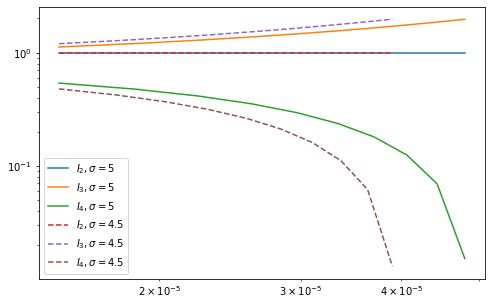

In [19]:
plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_90_four_sigma_5['source_x']), np.array(df_theta_90_four_sigma_5['I_2']), label = r'$I_2, \sigma = 5$')
plt.loglog(np.array(df_theta_90_four_sigma_5['source_x']), np.array(df_theta_90_four_sigma_5['I_3']), label = r'$I_3, \sigma = 5$')
plt.loglog(np.array(df_theta_90_four_sigma_5['source_x']), np.array(df_theta_90_four_sigma_5['I_4']), label = r'$I_4, \sigma = 5$')

plt.loglog(np.array(df_theta_90_four_sigma_45['source_x']), np.array(df_theta_90_four_sigma_45['I_2']), label = r'$I_2, \sigma = 4.5$', ls = '--')
plt.loglog(np.array(df_theta_90_four_sigma_45['source_x']), np.array(df_theta_90_four_sigma_45['I_3']), label = r'$I_3, \sigma = 4.5$', ls = '--')
plt.loglog(np.array(df_theta_90_four_sigma_45['source_x']), np.array(df_theta_90_four_sigma_45['I_4']), label = r'$I_4, \sigma = 4.5$', ls = '--')
plt.legend()

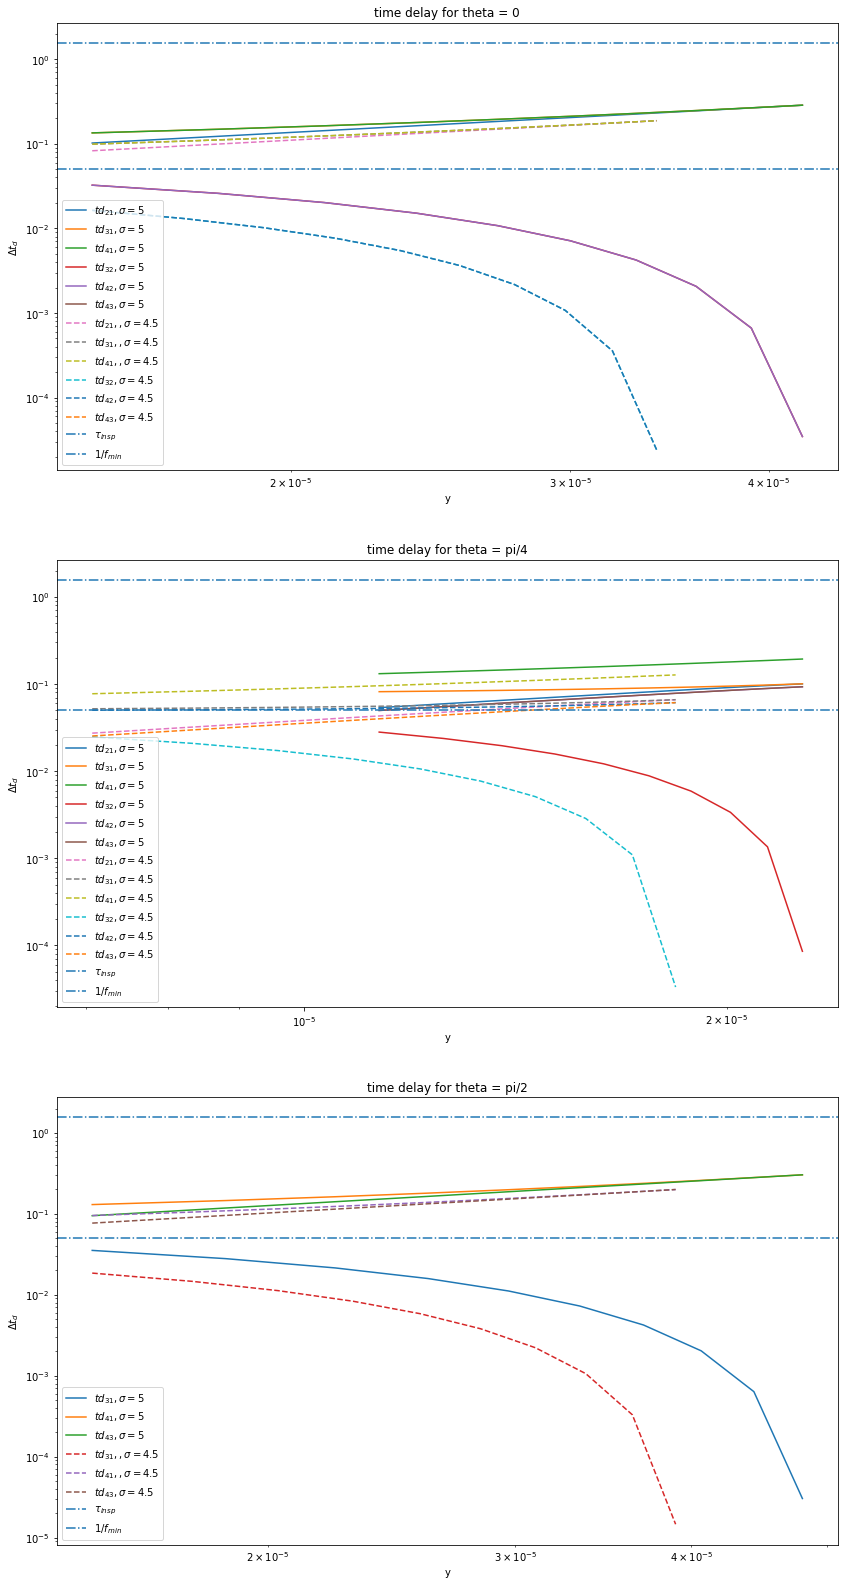

In [20]:
plt.figure(figsize = (14, 28))
# TIME DELAY PLOT FOR THETA = 0 DEG
plt.subplot(3, 1, 1)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['td_2']), label = r'$td_{21}, \sigma = 5$')
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['td_3']), label = r'$td_{31}, \sigma = 5$')
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['td_4']), label = r'$td_{41}, \sigma = 5$')
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['td_3']) - np.array(df_theta_0_four_sigma_5['td_2']), label = r'$td_{32}, \sigma = 5$')
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['td_4']) - np.array(df_theta_0_four_sigma_5['td_2']), label = r'$td_{42}, \sigma = 5$')
plt.loglog(np.array(df_theta_0_four_sigma_5['source_x']), np.array(df_theta_0_four_sigma_5['td_4']) - np.array(df_theta_0_four_sigma_5['td_3']), label = r'$td_{43}, \sigma = 5$')


plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['td_2']), '--', label = r'$td_{21}, , \sigma = 4.5$')
plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['td_3']), '--', label = r'$td_{31}, , \sigma = 4.5$')
plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['td_4']), '--', label = r'$td_{41}, , \sigma = 4.5$')
plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['td_3']) - np.array(df_theta_0_four_sigma_45['td_2']), '--', label = r'$td_{32}, \sigma = 4.5$')
plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['td_4']) - np.array(df_theta_0_four_sigma_45['td_2']), '--', label = r'$td_{42}, \sigma = 4.5$')
plt.loglog(np.array(df_theta_0_four_sigma_45['source_x']), np.array(df_theta_0_four_sigma_45['td_4']) - np.array(df_theta_0_four_sigma_45['td_3']), '--', label = r'$td_{43}, \sigma = 4.5$')

plt.axhline(y = 1.56, ls = '-.', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '-.', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = 0")
plt.legend()


# TIME DELAY PLOT FOR THETA = 45 DEG
plt.subplot(3, 1, 2)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['td_2']), label = r'$td_{21}, \sigma = 5$')
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['td_3']), label = r'$td_{31}, \sigma = 5$')
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['td_4']), label = r'$td_{41}, \sigma = 5$')
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['td_3']) - np.array(df_theta_45_four_sigma_5['td_2']), label = r'$td_{32}, \sigma = 5$')
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['td_4']) - np.array(df_theta_45_four_sigma_5['td_3']), label = r'$td_{42}, \sigma = 5$')
plt.loglog(np.array(df_theta_45_four_sigma_5['source_x']), np.array(df_theta_45_four_sigma_5['td_4']) - np.array(df_theta_45_four_sigma_5['td_3']), label = r'$td_{43}, \sigma = 5$')


plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['td_2']), '--', label = r'$td_{21}, \sigma = 4.5$')
plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['td_3']), '--', label = r'$td_{31}, \sigma = 4.5$')
plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['td_4']), '--', label = r'$td_{41}, \sigma = 4.5$')
plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['td_3']) - np.array(df_theta_45_four_sigma_45['td_2']), '--', label = r'$td_{32}, \sigma = 4.5$')
plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['td_4']) - np.array(df_theta_45_four_sigma_45['td_2']), '--', label = r'$td_{42}, \sigma = 4.5$')
plt.loglog(np.array(df_theta_45_four_sigma_45['source_x']), np.array(df_theta_45_four_sigma_45['td_4']) - np.array(df_theta_45_four_sigma_45['td_3']), '--', label = r'$td_{43}, \sigma = 4.5$')
plt.axhline(y = 1.56, ls = '-.', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '-.', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/4")
plt.legend()

# TIME DELAY PLOT FOR THETA = 90 DEG
plt.subplot(3, 1, 3)
#plt.figure(figsize = (8, 5))
#plt.loglog(np.array(df_theta_90_four_sigma_5['source_x']), np.array(df_theta_90_four_sigma_5['td_2']), label = r'$td_2, \sigma = 5$')
plt.loglog(np.array(df_theta_90_four_sigma_5['source_x']), np.array(df_theta_90_four_sigma_5['td_3']), label = r'$td_{31}, \sigma = 5$')
plt.loglog(np.array(df_theta_90_four_sigma_5['source_x']), np.array(df_theta_90_four_sigma_5['td_4']), label = r'$td_{41}, \sigma = 5$')
plt.loglog(np.array(df_theta_90_four_sigma_5['source_x']), np.array(df_theta_90_four_sigma_5['td_4']) - np.array(df_theta_90_four_sigma_5['td_3']), label = r'$td_{43}, \sigma = 5$')

#plt.loglog(np.array(df_theta_90_four_sigma_45['source_x']), np.array(df_theta_90_four_sigma_45['td_2']), '--', label = r'$td_2, , \sigma = 4.5$')
plt.loglog(np.array(df_theta_90_four_sigma_45['source_x']), np.array(df_theta_90_four_sigma_45['td_3']), '--', label = r'$td_{31}, , \sigma = 4.5$')
plt.loglog(np.array(df_theta_90_four_sigma_45['source_x']), np.array(df_theta_90_four_sigma_45['td_4']), '--', label = r'$td_{41}, , \sigma = 4.5$')
plt.loglog(np.array(df_theta_90_four_sigma_45['source_x']), np.array(df_theta_90_four_sigma_45['td_4']) - np.array(df_theta_90_four_sigma_45['td_3']), '--', label = r'$td_{43}, \sigma = 4.5$')
plt.axhline(y = 1.56, ls = '-.', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '-.', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/2")
plt.legend()

## MISMATCHES FOR TWO IMAGES CASE

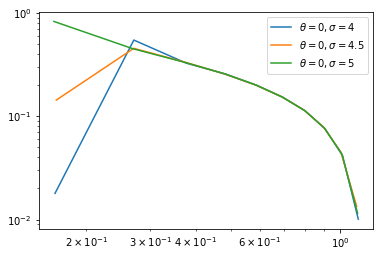

In [21]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
#df_niter_35 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_trial_niter=35.csv")
#df_mismatch = pd.read_csv(datapath + "overlap_lensing_sie_sigma=5_theta=0.csv")
#df_mismatch_sigma_4 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_niter=50_leftend_leftshift.csv")
df_mismatch_sigma_4 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0.csv")
df_mismatch_sigma_5 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=5_theta=0.csv")
df_mismatch_sigma_45 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4.5_theta=0.csv")
#plt.loglog(np.array(df_niter_35['source_x']), 1 - np.array(df_niter_35['overlap']))
#plt.loglog(np.array(df_mismatch['source_x']), 1 - np.array(df_mismatch['overlap']))
plt.loglog(np.array(df_mismatch_sigma_4['source_x']) / ein_rad_4, 1 - np.array(df_mismatch_sigma_4['overlap']), label = r'$\theta = 0, \sigma = 4$')
plt.loglog(np.array(df_mismatch_sigma_45['source_x']) / ein_rad_45, 1 - np.array(df_mismatch_sigma_45['overlap']), label = r'$\theta = 0, \sigma = 4.5$')
plt.loglog(np.array(df_mismatch_sigma_5['source_x']) / ein_rad_5, 1 - np.array(df_mismatch_sigma_5['overlap']), label = r'$\theta = 0, \sigma = 5$')
plt.legend()

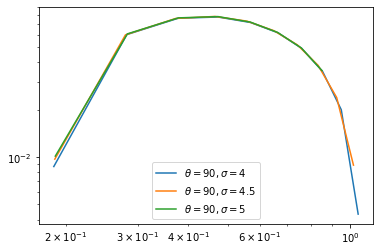

In [22]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
df_mismatch_sigma_4 = pd.read_csv(datapath + "overlap_lensing_sie_theta_90_sigma=4.csv")
df_mismatch_sigma_45 = pd.read_csv(datapath + "overlap_lensing_sie_theta_90_sigma=4.5.csv")
df_mismatch_sigma_5 = pd.read_csv(datapath + "overlap_lensing_sie_theta_90_sigma=5.csv")
plt.loglog(np.array(df_mismatch_sigma_4['source_x']) / ein_rad_4, 1 - np.array(df_mismatch_sigma_4['overlap']),label = r'$\theta = 90, \sigma = 4$')
plt.loglog(np.array(df_mismatch_sigma_45['source_x']) / ein_rad_45, 1 - np.array(df_mismatch_sigma_45['overlap']),label = r'$\theta = 90, \sigma = 4.5$')
plt.loglog(np.array(df_mismatch_sigma_5['source_x'])/ ein_rad_5, 1 - np.array(df_mismatch_sigma_5['overlap']), label = r'$\theta = 90, \sigma = 5$')
plt.legend()

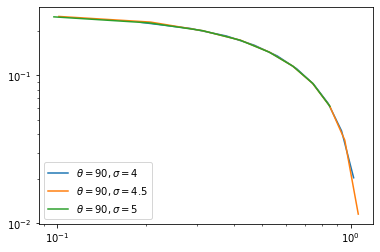

In [23]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
df_mismatch_sigma_4 = pd.read_csv(datapath + "overlap_lensing_sie_theta_45_sigma=4.csv")
df_mismatch_sigma_45 = pd.read_csv(datapath + "overlap_lensing_sie_theta_45_sigma=4.5.csv")
df_mismatch_sigma_5 = pd.read_csv(datapath + "overlap_lensing_sie_theta_45_sigma=5.csv")
plt.loglog(np.array(df_mismatch_sigma_4['source_x']) / ein_rad_4, 1 - np.array(df_mismatch_sigma_4['overlap']),label = r'$\theta = 90, \sigma = 4$')
plt.loglog(np.array(df_mismatch_sigma_45['source_x']) / ein_rad_45, 1 - np.array(df_mismatch_sigma_45['overlap']),label = r'$\theta = 90, \sigma = 4.5$')
plt.loglog(np.array(df_mismatch_sigma_5['source_x']) / ein_rad_5, 1 - np.array(df_mismatch_sigma_5['overlap']), label = r'$\theta = 90, \sigma = 5$')
plt.legend()

## Identifying the number of pair of images in the four images case.

In [24]:
df_theta_0_four_sigma_6 = pd.read_csv(datadirName + "flux_fourimages_theta_0_sigma=6.csv")
df_theta_0_four_sigma_6 = dataframe_sorted_four_images(df_theta_0_four_sigma_6)
df_theta_0_four_sigma_6['source_x'] = df_theta_0_four_sigma_6['source_x'] 
df_theta_0_four_sigma_6['td_21'] = df_theta_0_four_sigma_6['td_2'] * 86400
df_theta_0_four_sigma_6['td_31'] = df_theta_0_four_sigma_6['td_3'] * 86400
df_theta_0_four_sigma_6['td_41'] = df_theta_0_four_sigma_6['td_4'] * 86400
df_theta_0_four_sigma_6['td_32'] = df_theta_0_four_sigma_6['td_31'] - df_theta_0_four_sigma_6['td_21']
df_theta_0_four_sigma_6['td_42'] = df_theta_0_four_sigma_6['td_41'] - df_theta_0_four_sigma_6['td_21']
df_theta_0_four_sigma_6['td_43'] = df_theta_0_four_sigma_6['td_41'] - df_theta_0_four_sigma_6['td_31']

df_theta_0_four_sigma_6 = df_theta_0_four_sigma_6.drop(columns = ['td_1', 'td_2', 'td_3', 'td_4'])
df_theta_0_four_sigma_6['I_2'] = np.abs(df_theta_0_four_sigma_6['mu_2']) / np.abs(df_theta_0_four_sigma_6['mu_1'])
df_theta_0_four_sigma_6['I_3'] = np.abs(df_theta_0_four_sigma_6['mu_3']) / np.abs(df_theta_0_four_sigma_6['mu_1'])
df_theta_0_four_sigma_6['I_4'] = np.abs(df_theta_0_four_sigma_6['mu_4']) / np.abs(df_theta_0_four_sigma_6['mu_1'])
df_theta_0_four_sigma_6.to_csv(datadirName + "flux_fourimages_theta_0_sigma=6_sorted.csv", index = False)
df_theta_0_four_sigma_6

,source_x,mu_1,mu_2,mu_3,mu_4,td_21,td_31,td_41,td_32,td_42,td_43,I_2,I_3,I_4
0,1.000e-05,6.544e+00,8.686e+00,-6.216e+00,-6.216e+00,9.803e-02,2.083e-01,2.083e-01,1.103e-01,1.103e-01,0.000e+00,1.327e+00,9.500e-01,9.500e-01
1,1.544e-05,6.153e+00,9.590e+00,-6.473e+00,-6.473e+00,1.514e-01,2.402e-01,2.402e-01,8.882e-02,8.882e-02,0.000e+00,1.559e+00,1.052e+00,1.052e+00
2,2.089e-05,5.813e+00,1.073e+01,-6.877e+00,-6.877e+00,2.048e-01,2.744e-01,2.744e-01,6.960e-02,6.960e-02,0.000e+00,1.846e+00,1.183e+00,1.183e+00
3,2.633e-05,5.516e+00,1.223e+01,-7.478e+00,-7.478e+00,2.582e-01,3.108e-01,3.108e-01,5.264e-02,5.264e-02,0.000e+00,2.217e+00,1.356e+00,1.356e+00
4,3.178e-05,5.253e+00,1.427e+01,-8.368e+00,-8.368e+00,3.115e-01,3.495e-01,3.495e-01,3.798e-02,3.798e-02,0.000e+00,2.717e+00,1.593e+00,1.593e+00
5,3.722e-05,5.019e+00,1.722e+01,-9.726e+00,-9.726e+00,3.649e-01,3.905e-01,3.905e-01,2.563e-02,2.563e-02,0.000e+00,3.430e+00,1.938e+00,1.938e+00
6,4.267e-05,4.809e+00,2.184e+01,-1.194e+01,-1.194e+01,4.183e-01,4.339e-01,4.339e-01,1.565e-02,1.565e-02,0.000e+00,4.541e+00,2.482e+00,2.482e+00
7,4.811e-05,4.621e+00,3.016e+01,-1.600e+01,-1.600e+01,4.716e-01,4.797e-01,4.797e-01,8.066e-03,8.066e-03,0.000e+00,6.527e+00,3.463e+00,3.463e+00
8,5.356e-05,4.450e+00,4.952e+01,-2.560e+01,-2.560e+01,5.250e-01,5.280e-01,5.280e-01,2.940e-03,2.940e-03,0.000e+00,1.113e+01,5.754e+00,5.754e+00
9,5.900e-05,4.294e+00,1.455e+02,-7.350e+01,-7.350e+01,5.784e-01,5.787e-01,5.787e-01,3.351e-04,3.351e-04,0.000e+00,3.388e+01,1.712e+01,1.712e+01


In [25]:
df_theta_45_four_sigma_6 = pd.read_csv(datadirName + "flux_fourimages_theta_45_sigma=6.csv")
df_theta_45_four_sigma_6 = dataframe_sorted_four_images(df_theta_45_four_sigma_6)
df_theta_45_four_sigma_6['source_x'] = df_theta_45_four_sigma_6['source_x'] 
df_theta_45_four_sigma_6['td_21'] = df_theta_45_four_sigma_6['td_2'] * 86400 
df_theta_45_four_sigma_6['td_31'] = df_theta_45_four_sigma_6['td_3'] * 86400 
df_theta_45_four_sigma_6['td_41'] = df_theta_45_four_sigma_6['td_4'] * 86400 
df_theta_45_four_sigma_6['td_32'] = df_theta_45_four_sigma_6['td_31'] - df_theta_45_four_sigma_6['td_21']
df_theta_45_four_sigma_6['td_42'] = df_theta_45_four_sigma_6['td_41'] - df_theta_45_four_sigma_6['td_21']
df_theta_45_four_sigma_6['td_43'] = df_theta_45_four_sigma_6['td_41'] - df_theta_45_four_sigma_6['td_31']

df_theta_45_four_sigma_6 = df_theta_45_four_sigma_6.drop(columns = ['td_1', 'td_2', 'td_3', 'td_4'])
df_theta_45_four_sigma_6['I_2'] = np.abs(df_theta_45_four_sigma_6['mu_2']) / np.abs(df_theta_45_four_sigma_6['mu_1'])
df_theta_45_four_sigma_6['I_3'] = np.abs(df_theta_45_four_sigma_6['mu_3']) / np.abs(df_theta_45_four_sigma_6['mu_1'])
df_theta_45_four_sigma_6['I_4'] = np.abs(df_theta_45_four_sigma_6['mu_4']) / np.abs(df_theta_45_four_sigma_6['mu_1'])

df_theta_45_four_sigma_6.to_csv(datadirName + "flux_fourimages_theta_45_sigma=6_sorted.csv", index = False)
df_theta_45_four_sigma_6

,source_x,mu_1,mu_2,mu_3,mu_4,td_21,td_31,td_41,td_32,td_42,td_43,I_2,I_3,I_4
0,2.828e-06,7.244e+00,7.664e+00,-6.255e+00,-5.854e+00,1.960e-02,1.565e-01,1.747e-01,1.369e-01,1.551e-01,1.819e-02,1.058e+00,8.635e-01,8.081e-01
1,6.128e-06,7.039e+00,7.964e+00,-6.546e+00,-5.659e+00,4.239e-02,1.584e-01,1.978e-01,1.160e-01,1.554e-01,3.935e-02,1.131e+00,9.299e-01,8.040e-01
2,9.428e-06,6.854e+00,8.326e+00,-6.898e+00,-5.484e+00,6.502e-02,1.611e-01,2.215e-01,9.609e-02,1.564e-01,6.035e-02,1.215e+00,1.006e+00,8.002e-01
3,1.273e-05,6.685e+00,8.776e+00,-7.338e+00,-5.325e+00,8.740e-02,1.646e-01,2.457e-01,7.723e-02,1.583e-01,8.112e-02,1.313e+00,1.098e+00,7.965e-01
4,1.603e-05,6.530e+00,9.357e+00,-7.912e+00,-5.177e+00,1.094e-01,1.690e-01,2.706e-01,5.960e-02,1.611e-01,1.015e-01,1.433e+00,1.212e+00,7.929e-01
5,1.933e-05,6.384e+00,1.015e+01,-8.699e+00,-5.039e+00,1.310e-01,1.744e-01,2.959e-01,4.339e-02,1.649e-01,1.215e-01,1.590e+00,1.362e+00,7.892e-01
6,2.263e-05,6.248e+00,1.132e+01,-9.865e+00,-4.908e+00,1.519e-01,1.807e-01,3.216e-01,2.884e-02,1.697e-01,1.409e-01,1.812e+00,1.579e+00,7.855e-01
7,2.593e-05,6.118e+00,1.329e+01,-1.183e+01,-4.782e+00,1.720e-01,1.883e-01,3.477e-01,1.629e-02,1.757e-01,1.594e-01,2.172e+00,1.933e+00,7.816e-01
8,2.923e-05,5.995e+00,1.760e+01,-1.614e+01,-4.661e+00,1.910e-01,1.973e-01,3.742e-01,6.309e-03,1.833e-01,1.770e-01,2.937e+00,2.692e+00,7.776e-01
9,3.253e-05,5.876e+00,5.095e+01,-4.948e+01,-4.544e+00,2.081e-01,2.084e-01,4.011e-01,2.240e-04,1.929e-01,1.927e-01,8.670e+00,8.421e+00,7.733e-01


In [26]:
df_theta_90_four_sigma_6 = pd.read_csv(datadirName + "flux_fourimages_theta_90_sigma=6.csv")
df_theta_90_four_sigma_6 = dataframe_sorted_four_images(df_theta_90_four_sigma_6)
df_theta_90_four_sigma_6['source_x'] = df_theta_90_four_sigma_6['source_x'] 
df_theta_90_four_sigma_6['td_21'] = df_theta_90_four_sigma_6['td_2'] * 86400 
df_theta_90_four_sigma_6['td_31'] = df_theta_90_four_sigma_6['td_3'] * 86400 
df_theta_90_four_sigma_6['td_41'] = df_theta_90_four_sigma_6['td_4'] * 86400 
df_theta_90_four_sigma_6['td_32'] = df_theta_90_four_sigma_6['td_31'] - df_theta_90_four_sigma_6['td_21']
df_theta_90_four_sigma_6['td_42'] = df_theta_90_four_sigma_6['td_41'] - df_theta_90_four_sigma_6['td_21']
df_theta_90_four_sigma_6['td_43'] = df_theta_90_four_sigma_6['td_41'] - df_theta_90_four_sigma_6['td_31']

df_theta_90_four_sigma_6 = df_theta_90_four_sigma_6.drop(columns = ['td_1', 'td_2', 'td_3', 'td_4'])
df_theta_90_four_sigma_6['I_2'] = np.abs(df_theta_90_four_sigma_6['mu_2']) / np.abs(df_theta_90_four_sigma_6['mu_1'])
df_theta_90_four_sigma_6['I_3'] = np.abs(df_theta_90_four_sigma_6['mu_3']) / np.abs(df_theta_90_four_sigma_6['mu_1'])
df_theta_90_four_sigma_6['I_4'] = np.abs(df_theta_90_four_sigma_6['mu_4']) / np.abs(df_theta_90_four_sigma_6['mu_1'])
df_theta_90_four_sigma_6.to_csv(datadirName + "flux_fourimages_theta_90_sigma=6_sorted.csv", index = False)
df_theta_90_four_sigma_6

,source_x,mu_1,mu_2,mu_3,mu_4,td_21,td_31,td_41,td_32,td_42,td_43,I_2,I_3,I_4
0,1.000e-05,7.586e+00,7.586e+00,-7.204e+00,-5.169e+00,4.391e-16,1.135e-01,2.045e-01,1.135e-01,2.045e-01,9.101e-02,1.000e+00,9.497e-01,6.813e-01
1,1.667e-05,7.858e+00,7.858e+00,-8.218e+00,-4.697e+00,5.855e-16,8.923e-02,2.409e-01,8.923e-02,2.409e-01,1.517e-01,1.000e+00,1.046e+00,5.978e-01
2,2.333e-05,8.308e+00,8.308e+00,-9.518e+00,-4.293e+00,2.927e-16,6.801e-02,2.804e-01,6.801e-02,2.804e-01,2.124e-01,1.000e+00,1.146e+00,5.168e-01
3,3.000e-05,8.998e+00,8.998e+00,-1.125e+01,-3.942e+00,1.276e-13,4.976e-02,3.228e-01,4.976e-02,3.228e-01,2.730e-01,1.000e+00,1.250e+00,4.382e-01
4,3.667e-05,1.005e+01,1.005e+01,-1.365e+01,-3.635e+00,6.183e-13,3.446e-02,3.682e-01,3.446e-02,3.682e-01,3.337e-01,1.000e+00,1.358e+00,3.617e-01
5,4.333e-05,1.171e+01,1.171e+01,-1.723e+01,-3.364e+00,0.000e+00,2.205e-02,4.164e-01,2.205e-02,4.164e-01,3.944e-01,1.000e+00,1.472e+00,2.874e-01
6,5.000e-05,1.454e+01,1.454e+01,-2.313e+01,-3.123e+00,1.464e-16,1.247e-02,4.675e-01,1.247e-02,4.675e-01,4.551e-01,1.000e+00,1.591e+00,2.148e-01
7,5.667e-05,2.020e+01,2.020e+01,-3.467e+01,-2.907e+00,5.855e-16,5.648e-03,5.214e-01,5.648e-03,5.214e-01,5.157e-01,1.000e+00,1.716e+00,1.439e-01
8,6.333e-05,3.646e+01,3.646e+01,-6.738e+01,-2.712e+00,3.951e-12,1.522e-03,5.779e-01,1.522e-03,5.779e-01,5.764e-01,1.000e+00,1.848e+00,7.439e-02
9,7.000e-05,4.130e+02,4.130e+02,-8.207e+02,-2.536e+00,6.777e-14,1.043e-05,6.371e-01,1.043e-05,6.371e-01,6.371e-01,1.000e+00,1.987e+00,6.141e-03


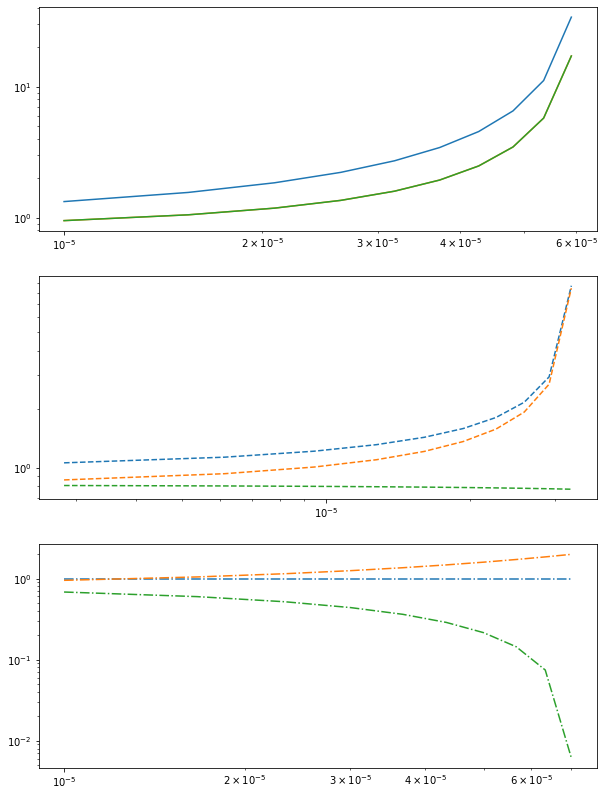

In [27]:
plt.figure(figsize = (10, 14))
plt.subplot(3, 1, 1)
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['I_2']), label = r'$I_2, \sigma = 6$')
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['I_3']), label = r'$I_3, \sigma = 6$')
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['I_4']), label = r'$I_4, \sigma = 6$')

plt.subplot(3, 1, 2)
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['I_2']), '--', label = r'$I_2, \sigma = 6$')
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['I_3']), '--', label = r'$I_3, \sigma = 6$')
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['I_4']), '--', label = r'$I_4, \sigma = 6$')

plt.subplot(3, 1, 3)
plt.loglog(np.array(df_theta_90_four_sigma_6['source_x']), np.array(df_theta_90_four_sigma_6['I_2']), '-.', label = r'$I_2, \sigma = 6$')
plt.loglog(np.array(df_theta_90_four_sigma_6['source_x']), np.array(df_theta_90_four_sigma_6['I_3']), '-.', label = r'$I_3, \sigma = 6$')
plt.loglog(np.array(df_theta_90_four_sigma_6['source_x']), np.array(df_theta_90_four_sigma_6['I_4']), '-.', label = r'$I_4, \sigma = 6$')


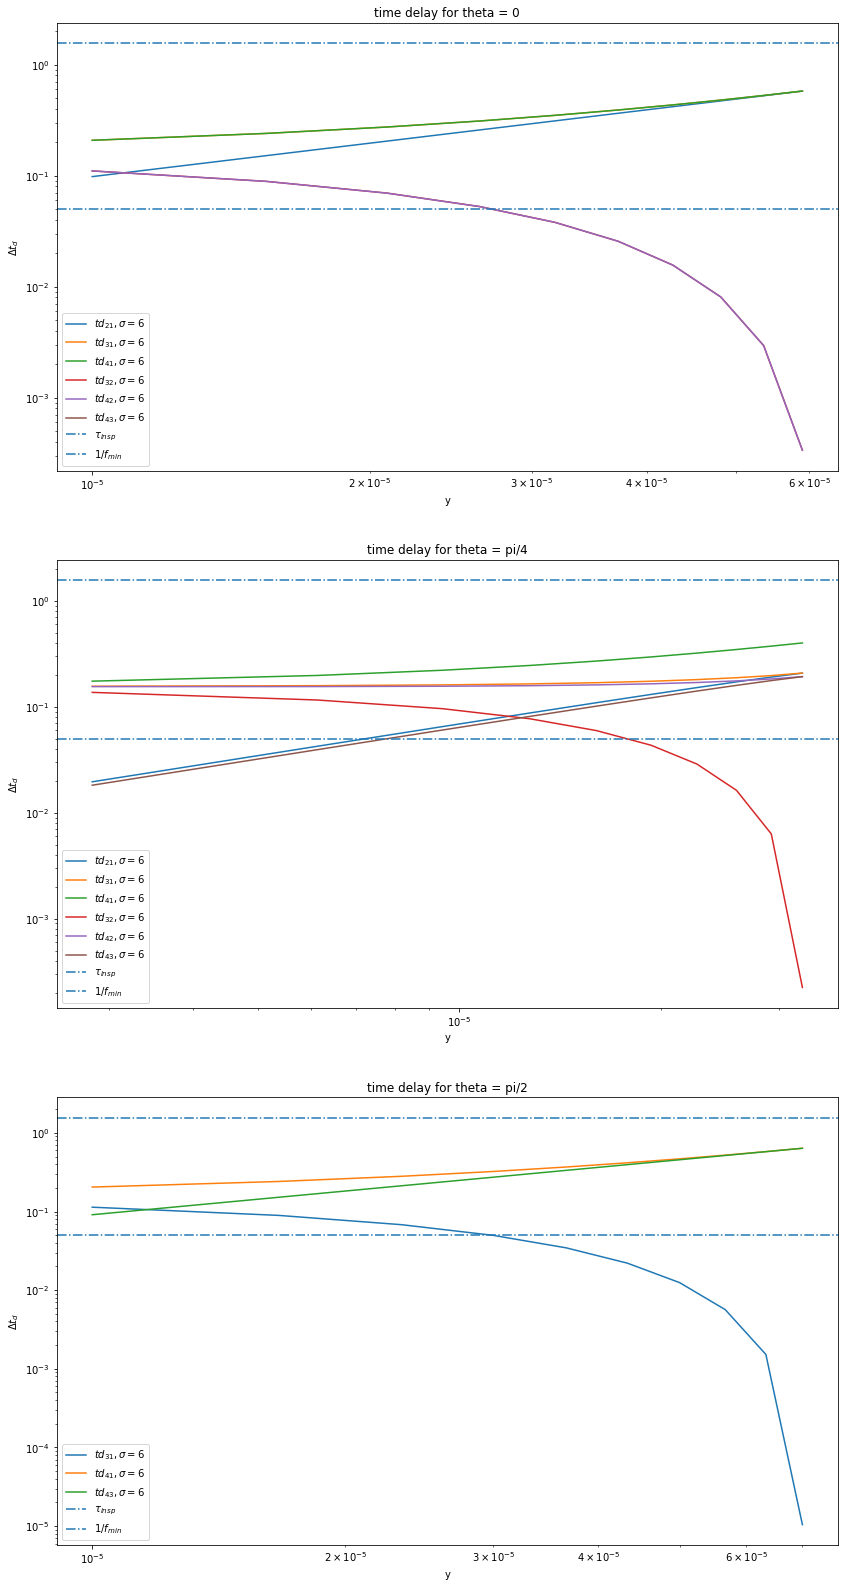

In [28]:
plt.figure(figsize = (14, 28))
# TIME DELAY PLOT FOR THETA = 0 DEG
plt.subplot(3, 1, 1)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['td_21']), label = r'$td_{21}, \sigma = 6$')
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['td_31']), label = r'$td_{31}, \sigma = 6$')
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['td_41']), label = r'$td_{41}, \sigma = 6$')
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['td_32']), label = r'$td_{32}, \sigma = 6$')
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['td_42']), label = r'$td_{42}, \sigma = 6$')
plt.loglog(np.array(df_theta_0_four_sigma_6['source_x']), np.array(df_theta_0_four_sigma_6['td_43']), label = r'$td_{43}, \sigma = 6$')

plt.axhline(y = 1.56, ls = '-.', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '-.', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = 0")
plt.legend()


# TIME DELAY PLOT FOR THETA = 45 DEG
plt.subplot(3, 1, 2)
#plt.figure(figsize = (8, 5))
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['td_21']), label = r'$td_{21}, \sigma = 6$')
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['td_31']), label = r'$td_{31}, \sigma = 6$')
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['td_41']), label = r'$td_{41}, \sigma = 6$')
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['td_32']), label = r'$td_{32}, \sigma = 6$')
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['td_42']), label = r'$td_{42}, \sigma = 6$')
plt.loglog(np.array(df_theta_45_four_sigma_6['source_x']), np.array(df_theta_45_four_sigma_6['td_43']), label = r'$td_{43}, \sigma = 6$')

plt.axhline(y = 1.56, ls = '-.', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '-.', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/4")
plt.legend()

# TIME DELAY PLOT FOR THETA = 90 DEG
plt.subplot(3, 1, 3)
#plt.figure(figsize = (8, 5))
#plt.loglog(np.array(df_theta_90_four_sigma_5['source_x']), np.array(df_theta_90_four_sigma_5['td_2']), label = r'$td_2, \sigma = 5$')
plt.loglog(np.array(df_theta_90_four_sigma_6['source_x']), np.array(df_theta_90_four_sigma_6['td_31']), label = r'$td_{31}, \sigma = 6$')
plt.loglog(np.array(df_theta_90_four_sigma_6['source_x']), np.array(df_theta_90_four_sigma_6['td_41']), label = r'$td_{41}, \sigma = 6$')
plt.loglog(np.array(df_theta_90_four_sigma_6['source_x']), np.array(df_theta_90_four_sigma_6['td_43']), label = r'$td_{43}, \sigma = 6$')

plt.axhline(y = 1.56, ls = '-.', label = r'$\tau_{insp}$')
plt.axhline(y = 0.05, ls = '-.', label = r'$1 / f_{min}$')
plt.xlabel('y')
plt.ylabel(r'$\Delta t_d$')
plt.title("time delay for theta = pi/2")
plt.legend()


In [32]:
def num_imgs(dirname = datadirName,
            datname = None):
    new_df = pd.DataFrame(columns=[0, 1, 2, 3, 4, 5, 6, 7, 8])
    
    df = pd.read_csv(dirname + datname)
    df_mu = df[['mu_1', 'mu_2', 'mu_3', 'mu_4']]
    df_td = df[['td_21', 'td_31', 'td_41']]
    df_td['td_11'] = 0
    df_td = df_td[['td_11', 'td_21', 'td_31', 'td_41']]
    
    imag_ind = [1, 2, 3, 4]
    td_dict = {0: '21', 1: '31', 2: '41', 3: '32', 4: '42', 5: '43'}
    
    wave_opt_td = [[] for i in range(df.shape[0])]
    geo_opt_td = [[] for i in range(df.shape[0])]
    for i in range(df.shape[0]):
        td_row = np.array(df.loc[i][5:11])
        ind = np.where(td_row < 0.05)[0]
        
        print(f'distance: {df.loc[i][0]}')
        if len(ind) == 0: 
            print('No image pairs in wave optics regime')
        else:
            for j in ind:
                print(f'image pairs in wave optics regime are: {td_dict[j]}')
                #wave_opt_td[i] += [td_dict[j]]
                wave_opt_td[i] += [int(k) for k in "".join([td_dict[j]])]
            wave_opt_td[i] = list(set(wave_opt_td[i]))
        geo_opt_td[i] =list(set(imag_ind) - set(wave_opt_td[i]))
        
        #new_df.at[i, 0] = df.loc[i]['source_x']
        new_df.at[i, 0] = df.loc[i]['theta']
        
        for l in range(len(geo_opt_td[i])):
            new_df.at[i, geo_opt_td[i][l]] = df.loc[i][geo_opt_td[i][l]]
            new_df.at[i, geo_opt_td[i][l] + 4] = df_td.loc[i][geo_opt_td[i][l] - 1]
        
        print('\n')
        
    new_df = new_df.fillna(0)
    print(wave_opt_td)
    print(geo_opt_td)
    
    print('\n')
    return new_df
    
#df_four_images_preprocess = num_imgs(datname = 'flux_fourimages_theta_45_sigma=6_sorted.csv')
df_four_images_preprocess_theta = num_imgs(datname = "flux_fourimages_y_0.08_sigma=6_sorted.csv")
df_four_images_preprocess.columns = ['source_x', 'mu_1', 'mu_2', 'mu_3', 'mu_4', 'td_1', 'td_2', 'td_3', 'td_4']
print(df_four_images_preprocess)
#df_four_images_preprocess.to_csv(datadirName + "flux_fourimages_theta_90_sigma=6_sorted_preproc.csv", index = False)

distance: 0.031415926535897934
image pairs in wave optics regime are: 32
image pairs in wave optics regime are: 42
image pairs in wave optics regime are: 43


distance: 0.20055921976230784
image pairs in wave optics regime are: 32


distance: 0.36970251298871776
image pairs in wave optics regime are: 32


distance: 0.5388458062151278
image pairs in wave optics regime are: 32


distance: 0.7079890994415377
image pairs in wave optics regime are: 32


distance: 0.8771323926679475
image pairs in wave optics regime are: 32


distance: 1.0462756858943576
image pairs in wave optics regime are: 32


distance: 1.2154189791207677
image pairs in wave optics regime are: 32


distance: 1.3845622723471769
image pairs in wave optics regime are: 32


distance: 1.5537055655735872
image pairs in wave optics regime are: 21
image pairs in wave optics regime are: 31
image pairs in wave optics regime are: 32


[[2, 3, 4], [2, 3], [2, 3], [2, 3], [2, 3], [2, 3], [2, 3], [2, 3], [2, 3], [1, 2, 3]]
[[1], [1, 4

/Users/saifali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## READING THE TIME DELAY SURFACE PLOT FOR $\sigma = 6$

In [30]:
from astropy.io import fits
fits_time_delay = fits.open('/Users/saifali/Desktop/gwlensing/SIE_glafic/out_td_point.fits')
fits_time_delay.info()

Filename: /Users/saifali/Desktop/gwlensing/SIE_glafic/out_td_point.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (10, 10)   float32   


In [31]:
hdu_time_delay = fits_time_delay[0]
time_dalay_data = hdu_time_delay.data

In [32]:
x = np.arange(-1, 1, 0.2)
y = np.arange(-1, 1, 0.2)
xx, yy = np.meshgrid(x, y)

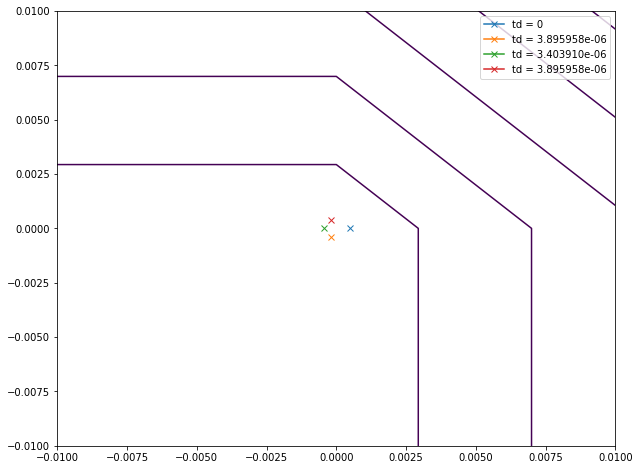

In [33]:
fig, ax = plt.subplots(figsize = (10, 8))
time_delay_surf = ax.contour(xx, yy, time_dalay_data, 1000)
ax.plot(4.895328e-04, 9.567281e-19, marker = 'x', label = 'td = 0')
ax.plot(-1.838669e-04, -3.777832e-04, marker = 'x', label = 'td = 3.895958e-06')
ax.plot(-4.295328e-04, -2.843967e-19, marker = 'x', label = 'td = 3.403910e-06')
ax.plot(-1.838669e-04,  3.777832e-04, marker = 'x', label = 'td = 3.895958e-06')
#plt.clabel(time_delay_surf, fontsize = 8)
#plt.title('x = 0.9, y = 0')
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.01)
plt.legend()

### MISMATCHES: FOUR IMAGES

In [34]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"

Text(0.1, 0.0001, '1 image (I)')

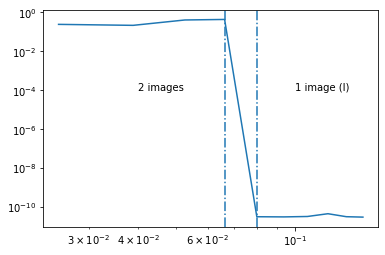

In [35]:
mismatch_fourimages_theta_0 = pd.read_csv(datapath + "overlap_lensing_sie_fourimages_sigma=6_theta=0.csv")
plt.loglog(np.array(mismatch_fourimages_theta_0['source_x']) / ein_rad_6 , 1 - np.array(mismatch_fourimages_theta_0['overlap']), label = 'theta = 45')
plt.axvline(2.633e-05 / ein_rad_6, ls = '-.')
plt.axvline(3.178e-05 / ein_rad_6, ls = '-.')

#plt.ylim(0.1, 1)
plt.text(4e-2, 1e-4, '2 images')
plt.text(1e-1, 1e-4, '1 image (I)')

Text(0.055, 0.6, '2 images')

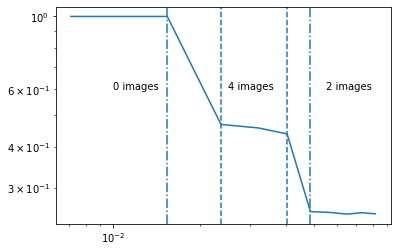

In [36]:
mismatch_fourimages_theta_45 = pd.read_csv(datapath + "overlap_lensing_sie_fourimages_sigma=6_theta=45.csv")
plt.loglog(np.array(mismatch_fourimages_theta_45['source_x']) / ein_rad_6 , 1 - np.array(mismatch_fourimages_theta_45['overlap']), label = 'theta = 45')
plt.axvline(6.128e-06 / ein_rad_6, ls = '-.')
plt.axvline(9.428e-06 / ein_rad_6, ls = '--')
plt.axvline(1.603e-05 / ein_rad_6, ls = '--')
plt.axvline(1.933e-05 / ein_rad_6, ls = '-.')

plt.text(1e-2, 6e-1, '0 images')
plt.text(2.5e-2, 6e-1, '4 images')
plt.text(5.5e-2, 6e-1, '2 images')

Text(0.1, 0.6, '1 image (IV)')

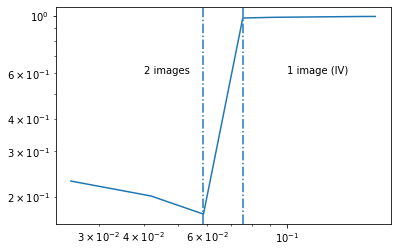

In [37]:
mismatch_fourimages_theta_90 = pd.read_csv(datapath + "overlap_lensing_sie_fourimages_sigma=6_theta=90.csv")
plt.loglog(np.array(mismatch_fourimages_theta_90['source_x']) / ein_rad_6 , 1 - np.array(mismatch_fourimages_theta_90['overlap']), label = 'theta = 45')
plt.axvline(2.333e-05 / ein_rad_6, ls = '-.')
plt.axvline(3.000e-05 / ein_rad_6, ls = '-.')

plt.text(4e-2, 6e-1, '2 images')
plt.text(1e-1, 6e-1, '1 image (IV)')

## IMAGES FOR DIFFERENT ANGLES

In [38]:
r = 0.25e-4
df_fourimages_theta = pd.read_csv(datadirName + "flux_fourimages_r_0.25e-4_sigma=6.csv")
df_fourimages_theta = dataframe_sorted_four_images(df_fourimages_theta)
df_fourimages_theta['td_21'] = df_fourimages_theta['td_2'] * 86400
df_fourimages_theta['td_31'] = df_fourimages_theta['td_3'] * 86400
df_fourimages_theta['td_41'] = df_fourimages_theta['td_4'] * 86400

df_fourimages_theta['td_32'] = df_fourimages_theta['td_31'] - df_fourimages_theta['td_21']
df_fourimages_theta['td_42'] = df_fourimages_theta['td_41'] - df_fourimages_theta['td_21']
df_fourimages_theta['td_43'] = df_fourimages_theta['td_41'] - df_fourimages_theta['td_31']
df_fourimages_theta = df_fourimages_theta.drop(columns = ['td_1', 'td_2', 'td_3', 'td_4'])
df_fourimages_theta = df_fourimages_theta.rename(columns = {'source_x': 'theta'})
df_fourimages_theta

,theta,mu_1,mu_2,mu_3,mu_4,td_21,td_31,td_41,td_32,td_42,td_43
0,3.142e-02,5.252e+00,1.431e+01,-8.706e+00,-8.072e+00,3.118e-01,3.458e-01,3.537e-01,3.403e-02,4.194e-02,7.912e-03
1,2.006e-01,5.289e+00,1.531e+01,-1.104e+01,-6.766e+00,3.038e-01,3.213e-01,3.717e-01,1.751e-02,6.789e-02,5.038e-02
2,3.697e-01,5.383e+00,1.816e+01,-1.489e+01,-5.859e+00,2.850e-01,2.925e-01,3.848e-01,7.467e-03,9.976e-02,9.229e-02
3,5.388e-01,5.539e+00,2.393e+01,-2.147e+01,-5.211e+00,2.570e-01,2.596e-01,3.928e-01,2.595e-03,1.357e-01,1.331e-01
4,7.080e-01,5.768e+00,3.100e+01,-2.923e+01,-4.739e+00,2.222e-01,2.233e-01,3.957e-01,1.059e-03,1.734e-01,1.724e-01
5,8.771e-01,6.086e+00,2.746e+01,-2.635e+01,-4.397e+00,1.830e-01,1.845e-01,3.935e-01,1.489e-03,2.105e-01,2.090e-01
6,1.046e+00,6.521e+00,1.939e+01,-1.895e+01,-4.152e+00,1.409e-01,1.452e-01,3.864e-01,4.333e-03,2.456e-01,2.412e-01
7,1.215e+00,7.114e+00,1.428e+01,-1.460e+01,-3.987e+00,9.664e-02,1.079e-01,3.745e-01,1.126e-02,2.779e-01,2.666e-01
8,1.385e+00,7.933e+00,1.127e+01,-1.251e+01,-3.890e+00,5.104e-02,7.487e-02,3.580e-01,2.383e-02,3.070e-01,2.832e-01
9,1.554e+00,9.098e+00,9.392e+00,-1.183e+01,-3.855e+00,4.697e-03,4.767e-02,3.372e-01,4.298e-02,3.325e-01,2.896e-01


In [39]:
df_fourimages_theta.to_csv(datadirName + "flux_fourimages_y_0.08_sigma=6_sorted.csv", index = False)

## IMAGES FOR DIFFERENT ELLIPTICTIES

In [40]:
df_fourimages_ellip = pd.read_csv(datadirName + "flux_fourimages_y_0.02_theta_0_sigma=6.csv")
df_fourimages_ellip = dataframe_sorted_four_images(df_fourimages_ellip)
df_fourimages_ellip

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4
0,8.000e-02,1.411e+01,2.823e+01,-1.977e+01,-1.977e+01,0.000e+00,9.390e-07,1.228e-06,1.228e-06
1,1.600e-01,8.096e+00,1.105e+01,-8.174e+00,-8.174e+00,0.000e+00,9.513e-07,1.926e-06,1.926e-06
2,2.400e-01,5.663e+00,6.850e+00,-4.858e+00,-4.858e+00,0.000e+00,9.634e-07,2.712e-06,2.712e-06
3,3.200e-01,4.343e+00,4.951e+00,-3.250e+00,-3.250e+00,0.000e+00,9.750e-07,3.564e-06,3.564e-06
4,4.000e-01,3.514e+00,3.867e+00,-2.296e+00,-2.296e+00,0.000e+00,9.856e-07,4.480e-06,4.480e-06
5,4.800e-01,2.943e+00,3.164e+00,-1.661e+00,-1.661e+00,0.000e+00,9.945e-07,5.450e-06,5.450e-06
6,5.600e-01,2.523e+00,2.669e+00,-1.208e+00,-1.208e+00,0.000e+00,1.001e-06,6.460e-06,6.460e-06
7,6.400e-01,2.200e+00,2.299e+00,-8.678e-01,-8.678e-01,0.000e+00,1.002e-06,7.471e-06,7.471e-06
8,7.200e-01,1.941e+00,2.009e+00,-6.022e-01,-6.022e-01,0.000e+00,9.938e-07,8.405e-06,8.405e-06
9,8.000e-01,1.724e+00,1.771e+00,-3.888e-01,-3.888e-01,0.000e+00,9.695e-07,9.088e-06,9.088e-06


In [41]:
df_fourimages_ellip = pd.read_csv(datadirName + "flux_fourimages_y_0.02_theta_0_sigma=6.csv")
df_fourimages_ellip = dataframe_sorted_four_images(df_fourimages_ellip)
df_fourimages_ellip['td_21'] = df_fourimages_ellip['td_2'] * 86400
df_fourimages_ellip['td_31'] = df_fourimages_ellip['td_3'] * 86400
df_fourimages_ellip['td_41'] = df_fourimages_ellip['td_4'] * 86400

df_fourimages_ellip['td_32'] = df_fourimages_ellip['td_31'] - df_fourimages_ellip['td_21']
df_fourimages_ellip['td_42'] = df_fourimages_ellip['td_41'] - df_fourimages_ellip['td_21']
df_fourimages_ellip['td_43'] = df_fourimages_ellip['td_41'] - df_fourimages_ellip['td_31']
df_fourimages_ellip = df_fourimages_ellip.drop(columns = ['td_1', 'td_2', 'td_3', 'td_4'])
df_fourimages_ellip = df_fourimages_ellip.rename(columns = {'source_x': 'ellip'})
df_fourimages_ellip

,ellip,mu_1,mu_2,mu_3,mu_4,td_21,td_31,td_41,td_32,td_42,td_43
0,8.000e-02,1.411e+01,2.823e+01,-1.977e+01,-1.977e+01,8.113e-02,1.061e-01,1.061e-01,2.496e-02,2.496e-02,0.000e+00
1,1.600e-01,8.096e+00,1.105e+01,-8.174e+00,-8.174e+00,8.219e-02,1.664e-01,1.664e-01,8.425e-02,8.425e-02,0.000e+00
2,2.400e-01,5.663e+00,6.850e+00,-4.858e+00,-4.858e+00,8.324e-02,2.343e-01,2.343e-01,1.510e-01,1.510e-01,0.000e+00
3,3.200e-01,4.343e+00,4.951e+00,-3.250e+00,-3.250e+00,8.424e-02,3.080e-01,3.080e-01,2.237e-01,2.237e-01,0.000e+00
4,4.000e-01,3.514e+00,3.867e+00,-2.296e+00,-2.296e+00,8.516e-02,3.871e-01,3.871e-01,3.019e-01,3.019e-01,0.000e+00
5,4.800e-01,2.943e+00,3.164e+00,-1.661e+00,-1.661e+00,8.593e-02,4.709e-01,4.709e-01,3.850e-01,3.850e-01,0.000e+00
6,5.600e-01,2.523e+00,2.669e+00,-1.208e+00,-1.208e+00,8.644e-02,5.581e-01,5.581e-01,4.717e-01,4.717e-01,0.000e+00
7,6.400e-01,2.200e+00,2.299e+00,-8.678e-01,-8.678e-01,8.653e-02,6.455e-01,6.455e-01,5.589e-01,5.589e-01,0.000e+00
8,7.200e-01,1.941e+00,2.009e+00,-6.022e-01,-6.022e-01,8.587e-02,7.262e-01,7.262e-01,6.404e-01,6.404e-01,0.000e+00
9,8.000e-01,1.724e+00,1.771e+00,-3.888e-01,-3.888e-01,8.377e-02,7.852e-01,7.852e-01,7.014e-01,7.014e-01,0.000e+00


In [42]:
df_fourimages_ellip.to_csv(datadirName + "flux_fourimages_y_0.02_theta_0_sigma=6_sorted.csv", index = False)